In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
import openpyxl

# import data from xslx file
data = pd.read_excel('sensor poli AG D.xlsx', header=1)

df.head()

,Frecuencia,Poli Ag D 0.1v2,Poli Ag D 0.08v2,Poli Ag D 0.04v2,Poli Ag D 0.02v2,Poli Ag D 0.01v2
1,300000,-12.89315,-12.0146,-5.97928,-3.03886,-1.55245
2,1700110,-13.61609,-12.65465,-6.30817,-3.30696,-1.85888
3,3100220,-13.77256,-12.7448,-6.37285,-3.3744,-1.91953
4,4500330,-13.74865,-12.77049,-6.38177,-3.37529,-1.9651
5,5900440,-13.78471,-12.76089,-6.40277,-3.403,-1.98613


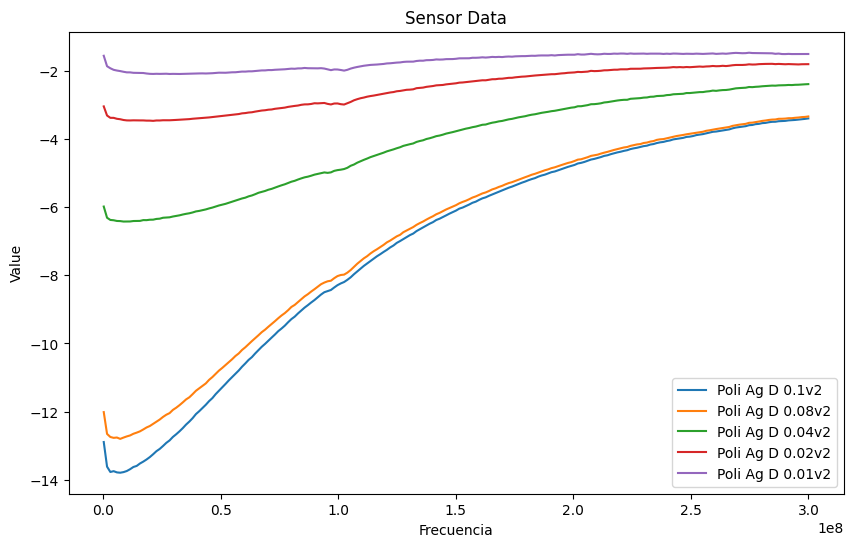

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for column in data.columns[1:]:
    plt.plot(data['Frecuencia'], data[column], label=column)
plt.xlabel('Frecuencia')
plt.ylabel('Value')
plt.legend()
plt.title('Sensor Data')
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Create a dictionary to store the models for each substance
models = {}
for substance in data.columns[1:]:
    # Get the data for the current substance
    data_substance = data[['Frecuencia', substance]].dropna()

    # Create a model for the current substance
    model = PolynomialRegression(2)
    model.fit(data_substance[['Frecuencia']], data_substance[substance])

    # Store the model
    models[substance] = model

# Calculate R-squared for each model
r_squared = {}
for substance, model in models.items():
    data_substance = data[['Frecuencia', substance]].dropna()
    score = model.score(data_substance[['Frecuencia']], data_substance[substance])
    r_squared[substance] = score

# Print R-squared values
r_squared

{'Poli Ag D 0.1v2': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'Poli Ag D 0.08v2': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'Poli Ag D 0.04v2': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'Poli Ag D 0.02v2': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())]),
 'Poli Ag D 0.01v2': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                 ('linearregression', LinearRegression())])}